In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import scipy.misc as smp
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from keras import models, optimizers, Sequential, regularizers, layers
from keras.models import load_model, model_from_json
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from keras.applications import VGG16, VGG19
from keras.callbacks import EarlyStopping
from keras.layers import Flatten, Dropout, Reshape, Dense, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
import itertools

np.random.seed(123)

Using TensorFlow backend.


In [1]:
# import kaggle

In [68]:
!pip install wget

  Stored in directory: /home/jovyan/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [1]:
!pwd

/home/jovyan/work


In [2]:
# !pip install kaggle

In [3]:
# !kaggle competitions download -c aptos2019-blindness-detection

In [6]:
!ls

Untitled.ipynb


In [47]:
!jar xvf train_images.zip

/bin/sh: 1: jar: not found


In [48]:
ls

0005cfc8afb6.png  446edc2b054f.png  86683eb8921e.png  c3e13501e198.png
003f0afdcd15.png  447d8e8f446d.png  86c179395e2b.png  c3e311d899ed.png
006efc72b638.png  448c1f328542.png  86ca8c8d563d.png  c3fea3498883.png
00836aaacf06.png  44c7a0b9820f.png  86fd5df366b2.png  c423a0b222de.png
009245722fa4.png  450e2a692142.png  87252c491c19.png  c434df57e02b.png
009c019a7309.png  4541683880a4.png  872d2097a7ad.png  c43d6133ca37.png
010d915e229a.png  456b6a5827d4.png  87487c4c4ddc.png  c475aefa6255.png
0111b949947e.png  456c55e0d8f9.png  8750b8bfe28a.png  c47fe8e08b85.png
01499815e469.png  4578ed5eeb9f.png  8798cccbcb0d.png  c49c47887520.png
0167076e7089.png  458b2446e3dd.png  880eacc5ab23.png  c4a81ee6362b.png
01c31b10ab99.png  45ca3fb3bfc5.png  881ab102a44e.png  c4cfcc09fdf1.png
01c5ba195207.png  45f34a152021.png  881c69e5dcd8.png  c537a3ca84b1.png
01e4d86b3a30.png  460bc010f96a.png  887b4413f87c.png  c54f83a2d026.png
020921b796d5.png  462507c543fb.png  88e0bd76f4c9.png  c56dff0321fa.png
020f69

In [50]:
cd ..

/home/jovyan/work


In [51]:
ls

data/  Untitled.ipynb


In [59]:
mkdir data

In [60]:
cd data

/home/jovyan/work/data


In [63]:
mkdir train_images

In [64]:
mkdir test_images

In [65]:
mv train_images.zip train_images

In [66]:
mv test_images.zip test_images

In [67]:
!unzip train_images/train_images.zip

Archive:  train_images/train_images.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of train_images/train_images.zip or
        train_images/train_images.zip.zip, and cannot find train_images/train_images.zip.ZIP, period.


In [69]:
rm train_images/train_images.zip

In [70]:
cd train_images

/home/jovyan/work/data/train_images


In [90]:
ls

train_images.zip


In [94]:
pwd

'/home/jovyan/work/data/train_images'

In [97]:
!unzip train_images.zip

Archive:  train_images.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of train_images.zip or
        train_images.zip.zip, and cannot find train_images.zip.ZIP, period.


In [84]:
import wget
wget.download('https://www.kaggle.com/c/aptos2019-blindness-detection/download/train_images.zip')

'train_images (1).zip'

In [83]:
ls -l --block-size=MB

total 1MB
-rw-r--r--. 1 jovyan users 1MB Jul  4 00:28 train_images.zip


In [4]:
# !kaggle competitions download -c aptos2019-blindness-detection -f train_images.zip --force

In [101]:
ls

train_images.zip


In [102]:
!unzip train_images.zip

Archive:  train_images.zip
  inflating: 7b9d519cbd66.png        
  inflating: ae49cc60f251.png        
  inflating: b294927b14b0.png        
  inflating: f4d3777f2710.png        
  inflating: d74ccc796517.png        
  inflating: 15bed5adde74.png        
  inflating: f002ce614c59.png        
  inflating: 7335a2d43ada.png        
  inflating: 9b7b6e4db1d5.png        
  inflating: 1968183f0e61.png        
  inflating: d91273efb92a.png        
  inflating: 5cf9127f251a.png        
  inflating: 370f575adb23.png        
  inflating: 4c17e85686f0.png        
  inflating: 4f7755e74a9e.png        
  inflating: 25e9fd872182.png        
  inflating: b64e1eef3d63.png        
  inflating: e7d2c2c3b30f.png        
  inflating: bfda2fd0533a.png        
  inflating: 224bb938e2dd.png        
  inflating: d51e5d7484ea.png        
  inflating: dc6fa1b38b83.png        
  inflating: 74898f372d2b.png        
  inflating: 152db3de8120.png        
  inflating: 07929d32b5b3.png        
  inflating: 0773a1c326

  inflating: 757572337fd0.png        
  inflating: df4aec4a0eaf.png        
  inflating: ed2c52c14493.png        
  inflating: d2c6b99ef62c.png        
  inflating: 15cd5f52d300.png        
  inflating: 191a711852bd.png        
  inflating: b8fb9f55cd6d.png        
  inflating: bda91b76095b.png        
  inflating: f35d80bb1a22.png        
  inflating: 175dd560810a.png        
  inflating: 4df6a81b476e.png        
  inflating: 92fcf50b3562.png        
  inflating: 917f76f360b6.png        
  inflating: 4a7dc013e802.png        
  inflating: a77dbec966d4.png        
  inflating: d473f6fafba0.png        
  inflating: bdc6c60e9133.png        
  inflating: 91cf56d3d1af.png        
  inflating: ad029ba7fa8b.png        
  inflating: 91a88d3b0358.png        
  inflating: 1ee1eb7943db.png        
  inflating: 6b30767595d8.png        
  inflating: 80e7cc0a0649.png        
  inflating: fa3e544a7401.png        
  inflating: 2628305cbb29.png        
  inflating: 7a238a1d3cf3.png        
  inflating:

  inflating: d838d5b9f571.png        
  inflating: 912fbe06407e.png        
  inflating: 36b5b3c9fb32.png        
  inflating: 6504b703c429.png        
  inflating: 415d5c5e785f.png        
  inflating: 78d53c82a23e.png        
  inflating: 66393d8c60ba.png        
  inflating: 0c917c372572.png        
  inflating: 5445255635f0.png        
  inflating: 521d3e264d71.png        
  inflating: 2d9d97a6e713.png        
  inflating: be6cbf6e5b10.png        
  inflating: 342edf9b889d.png        
  inflating: ab7991df166b.png        
  inflating: 8c87bd748996.png        
  inflating: 000c1434d8d7.png        
  inflating: b9519abce0c1.png        
  inflating: 8b58f9a338e8.png        
  inflating: ffa47f6a7bf4.png        
  inflating: 8201cab8322d.png        
  inflating: b574d229ec4c.png        
  inflating: f9d8ff3e6592.png        
  inflating: 48a45619d1a3.png        
  inflating: e229aca862c7.png        
  inflating: 494fc9c745a3.png        
  inflating: 35aa7f5c2ec0.png        
  inflating:

  inflating: 44e0d56e9d42.png        
  inflating: 6c3589d7ed8d.png        
  inflating: 1ec95179cdfe.png        
  inflating: cb547e723a16.png        
  inflating: b3f31c371e59.png        
  inflating: ff631653374e.png        
  inflating: f952ad2e4356.png        
  inflating: 2d04cead4d3a.png        
  inflating: f72adcac5638.png        
  inflating: cb28adab4e8a.png        
  inflating: 9bf060db8376.png        
  inflating: 7e9081e95bf6.png        
  inflating: 89b044cbaf85.png        
  inflating: 6d292ca4c9ad.png        
  inflating: 6d454444f17c.png        
  inflating: 1cb6961d141c.png        
  inflating: a3d2a0c4cd17.png        
  inflating: 4f6abc40c72d.png        
  inflating: ef5155990874.png        
  inflating: 4134b290f5f3.png        
  inflating: 2682e6da9050.png        
  inflating: 8f318a978844.png        
  inflating: 565f3404f9b2.png        
  inflating: c70d09370109.png        
  inflating: bd34a0639575.png        
  inflating: 9a28d4e8aef0.png        
  inflating:

  inflating: 6cb96a6fb029.png        
  inflating: c334f8688b77.png        
  inflating: 8cb6b5b2f19c.png        
  inflating: bec0acd539b2.png        
  inflating: 35beb47fe159.png        
  inflating: 2b074afdf626.png        
  inflating: c568e5245ea5.png        
  inflating: e26bcae6c67b.png        
  inflating: 37c523296d42.png        
  inflating: 096436d68d06.png        
  inflating: 2a93334f663a.png        
  inflating: 698d6e422a80.png        
  inflating: dea7538bb91a.png        
  inflating: bd06028eb7dd.png        
  inflating: 5cbe88914a72.png        
  inflating: b65ff67743b2.png        
  inflating: 3a122851e526.png        
  inflating: 2376e5415458.png        
  inflating: a6731dd737af.png        
  inflating: 31cb39681f6a.png        
  inflating: 87a9f4d20f07.png        
  inflating: 5f70ad48a525.png        
  inflating: eedae6b28f96.png        
  inflating: c561bcd519e9.png        
  inflating: 4ed31cc07366.png        
  inflating: 4c129470cec4.png        
  inflating:

  inflating: 966c07831334.png        
  inflating: 2d07162a13b1.png        
  inflating: c102db7634d8.png        
  inflating: 523d0c2cb4d6.png        
  inflating: e77a93c3d9a9.png        
  inflating: 835b9f6e12ba.png        
  inflating: 461fa5292fda.png        
  inflating: d968a983d4d2.png        
  inflating: c52bb7343387.png        
  inflating: 18af532e7e1e.png        
  inflating: c373b73a80c8.png        
  inflating: ca9c912ebad7.png        
  inflating: af133a85ea0c.png        
  inflating: f9d52509c571.png        
  inflating: 357f02a779d7.png        
  inflating: 921433215353.png        
  inflating: 96b5474ae604.png        
  inflating: 50ddd7d976df.png        
  inflating: eeb231c3ef1f.png        
  inflating: 7269a1d84a57.png        
  inflating: 876e1dd12d38.png        
  inflating: 98104c8c67eb.png        
  inflating: a1872f9c0cba.png        
  inflating: 821789e9053f.png        
  inflating: 6c3745a222da.png        
  inflating: 200d947f75db.png        
  inflating:

  inflating: 3e1f8fecb06f.png        
  inflating: 33b91def2035.png        
  inflating: aa94cc4bfd84.png        
  inflating: 93802d1e3c41.png        
  inflating: 7d1b40fdbd86.png        
  inflating: 79be2ff796bf.png        
  inflating: 944a233fbf8e.png        
  inflating: 53ddae6a619e.png        
  inflating: 3a1ecf5e2839.png        
  inflating: 0afbeeef0ff7.png        
  inflating: 44f7f3ef9d50.png        
  inflating: 85cbb84ac8e0.png        
  inflating: b762c29cf2f3.png        
  inflating: 0a74c92e287c.png        
  inflating: 9fab29e69a6b.png        
  inflating: 9b95d6203406.png        
  inflating: e34fa07bd64d.png        
  inflating: 8e20b8fac7c3.png        
  inflating: f0a2dc580009.png        
  inflating: e1dc02a3dc2a.png        
  inflating: c013e869acce.png        
  inflating: 2a4520f1f9a3.png        
  inflating: e9129ce55fd7.png        
  inflating: 54b322c66d01.png        
  inflating: e6a58edc5b42.png        
  inflating: 8ed586c43023.png        
  inflating:

  inflating: e4151feb8443.png        
  inflating: eb32a815f78c.png        
  inflating: b460ca9fa26f.png        
  inflating: 39aa3cd93c50.png        
  inflating: 5b1c4cefeb24.png        
  inflating: 482088e6be44.png        
  inflating: c261b1aaa828.png        
  inflating: 1dfe599d12a9.png        
  inflating: b598bc9753c2.png        
  inflating: a6c9e96a10d7.png        
  inflating: 2a47e5b21791.png        
  inflating: 4b1001050f1d.png        
  inflating: 5f6db235c04d.png        
  inflating: a646c084928c.png        
  inflating: 4fa26d065ad3.png        
  inflating: 0babc12807b2.png        
  inflating: a32b5ce3d48a.png        
  inflating: 9faad91b6578.png        
  inflating: 84b4da14bc23.png        
  inflating: 7e6e90a93aa5.png        
  inflating: b7278b4f2448.png        
  inflating: f0098e9d4aee.png        
  inflating: 10ecc5292ab1.png        
  inflating: 3dec415b188a.png        
  inflating: 55fd453001cc.png        
  inflating: b3c0c3330278.png        
  inflating:

  inflating: b2748ac28fc1.png        
  inflating: d868acdccb5b.png        
  inflating: 65f69234c8a7.png        
  inflating: 7b49041cbf17.png        
  inflating: b8ac328009e0.png        
  inflating: aeb6f4fd2eed.png        
  inflating: b5834ee64541.png        
  inflating: b55d2ddb3e75.png        
  inflating: 7e70344b0c25.png        
  inflating: 8e76054f0831.png        
  inflating: 64ac539f58cb.png        
  inflating: 07a0e34c8d20.png        
  inflating: fd0a70082e7c.png        
  inflating: a47432cd41e7.png        
  inflating: 0e3572b5884a.png        
  inflating: 27e2be850a99.png        
  inflating: c8905b8d5cf1.png        
  inflating: 218c822a3dd9.png        
  inflating: ef476be214d4.png        
  inflating: 041f09eec1e8.png        
  inflating: 12ce6a1a1f31.png        
  inflating: 83fda7c0500b.png        
  inflating: e10190a9d52f.png        
  inflating: 89fc080f7e83.png        
  inflating: 0dbaa09a458c.png        
  inflating: a247961a5cd9.png        
  inflating:

  inflating: 27e4c800a449.png        
  inflating: 4ad6109706e8.png        
  inflating: 7be1b9aa78aa.png        
  inflating: da949aa67a4f.png        
  inflating: 9de9421f17e3.png        
  inflating: d8da9de62743.png        
  inflating: 66bae1ba227f.png        
  inflating: 59bd19c1c5bb.png        
  inflating: 1b495ac025b7.png        
  inflating: 3325b1fe55d2.png        
  inflating: c97472ef2c66.png        
  inflating: 13c191b59ed0.png        
  inflating: 02685f13cefd.png        
  inflating: 51405d042000.png        
  inflating: e387311a840e.png        
  inflating: 68987fb159ab.png        
  inflating: 7b211d8bd249.png        
  inflating: 875a2fc5fe23.png        
  inflating: e4730ddde408.png        
  inflating: b71428739d4e.png        
  inflating: 9f935fb38440.png        
  inflating: 211518c46162.png        
  inflating: df8365d6ac33.png        
  inflating: 2923971566fe.png        
  inflating: f481f76a6b75.png        
  inflating: 86baef833ae0.png        
  inflating:

In [131]:
pwd

'/home/jovyan/work/data'

In [127]:
ls

test_images.zip


In [124]:
cd test_images/

/home/jovyan/work/data/test_images


In [128]:
!unzip test_images.zip

Archive:  test_images.zip
  inflating: 270a532df702.png        
  inflating: 86fd5df366b2.png        
  inflating: 72dd7ca97f55.png        
  inflating: ec8f3ec97245.png        
  inflating: b3db392f5ee8.png        
  inflating: c71728f9535b.png        
  inflating: c7c003cdaaba.png        
  inflating: 67b614d32bcc.png        
  inflating: e982c6b5b726.png        
  inflating: e2fdc91493f4.png        
  inflating: 1d1539c0fb03.png        
  inflating: cefdb6b7fda2.png        
  inflating: f898d3e8ed90.png        
  inflating: 0ccfca342907.png        
  inflating: b48785a5f763.png        
  inflating: 010d915e229a.png        
  inflating: 2427e06125ae.png        
  inflating: 8cfa1b047c34.png        
  inflating: 9295bc2a4c7a.png        
  inflating: 741ef20e5e28.png        
  inflating: cd6cb8eca034.png        
  inflating: a78b86e53095.png        
  inflating: 1f2018b62574.png        
  inflating: e7557ee92477.png        
  inflating: d29d5d08e8af.png        
  inflating: 92c773457ab

  inflating: f543269b7905.png        
  inflating: 086727c22b75.png        
  inflating: 659f752cb810.png        
  inflating: aa60bff84a4c.png        
  inflating: 51e88694c81f.png        
  inflating: 2818509e0fb4.png        
  inflating: 893b140bd358.png        
  inflating: b9ee6ecab720.png        
  inflating: f04b0e450206.png        
  inflating: d31da0ad1639.png        
  inflating: fa09c97a2887.png        
  inflating: 9240b949fdc0.png        
  inflating: f41ef796cc0d.png        
  inflating: 10df48fe8c6c.png        
  inflating: 0749255f718d.png        
  inflating: 7d15cfc7fc45.png        
  inflating: e57ddcade9b2.png        
  inflating: 2884eb727858.png        
  inflating: 5c3872c226bb.png        
  inflating: c5ff8e81f094.png        
  inflating: aa381cb2abd2.png        
  inflating: 69b3f1028e99.png        
  inflating: d60e1e5c5c0f.png        
  inflating: aad278dd0f28.png        
  inflating: 9d5061ccc54c.png        
  inflating: 33a0fb5161e1.png        
  inflating:

  inflating: 7959bb5d9fa2.png        
  inflating: a9bc8e153c30.png        
  inflating: 2917c28c46d5.png        
  inflating: c72492c66aa4.png        
  inflating: b28619c58d35.png        
  inflating: 95e13f31b451.png        
  inflating: 98b2af334295.png        
  inflating: 6a4936e83256.png        
  inflating: 4306b1965385.png        
  inflating: 009c019a7309.png        
  inflating: 8798cccbcb0d.png        
  inflating: af9d45e2f834.png        
  inflating: c5e5fb775899.png        
  inflating: 45ca3fb3bfc5.png        
  inflating: 28cba3df4fa9.png        
  inflating: 01c31b10ab99.png        
  inflating: ff64897ac0d8.png        
  inflating: d87e5a77a830.png        
  inflating: 1282d33e6fbc.png        
  inflating: 4df7349f0806.png        
  inflating: 94fac9bf79e0.png        
  inflating: 5d6b9a2fddbf.png        
  inflating: fab7d8e8a1fa.png        
  inflating: d13d82ddc158.png        
  inflating: 98c2c42a0317.png        
  inflating: 462507c543fb.png        
  inflating:

  inflating: 933724df128e.png        
  inflating: ee506d853270.png        
  inflating: daa2d1d05f49.png        
  inflating: 4efa03e7d043.png        
  inflating: 9f1af957139f.png        
  inflating: dff147e8c2f9.png        
  inflating: 8b27d742f971.png        
  inflating: d23aa310a873.png        
  inflating: c03b523cfb2d.png        
  inflating: 5d3d0306074c.png        
  inflating: cb004a78aecf.png        
  inflating: 586eba507c88.png        
  inflating: ba8e74535796.png        
  inflating: 446d2a4606bf.png        
  inflating: 44c7a0b9820f.png        
  inflating: e319bce1d9ad.png        
  inflating: f7113d580492.png        
  inflating: e2300fd74ccc.png        
  inflating: 5544449ac18d.png        
  inflating: a14c98b20437.png        
  inflating: f44fd938c664.png        
  inflating: 57fa1bc682b6.png        
  inflating: 8c6ccbe00895.png        
  inflating: 82515c8bfd5e.png        
  inflating: ce588daddf8d.png        
  inflating: 46c4fb9164dc.png        
  inflating:

  inflating: dbf67b9638cd.png        
  inflating: f5b4f7bc69e7.png        
  inflating: df9fb7e570cd.png        
  inflating: 755615db51d3.png        
  inflating: 43c1d80cd2b2.png        
  inflating: 9f70f457f732.png        
  inflating: 48c30363529b.png        
  inflating: 23e7645e7e39.png        
  inflating: 4ae1cf32388b.png        
  inflating: 0622a0f615db.png        
  inflating: 16cfea326456.png        
  inflating: 087966da55c2.png        
  inflating: 531937254e73.png        
  inflating: b0fc3ca722ba.png        
  inflating: aa2c125a8ab8.png        
  inflating: 17bed9f69d84.png        
  inflating: 408ea007f294.png        
  inflating: 4e545daf0236.png        
  inflating: e1abc348d5bc.png        
  inflating: 58a536e6fdde.png        
  inflating: 57e7e85b6bcd.png        
  inflating: 0c7e40a82c60.png        
  inflating: f6a79dbb4339.png        
  inflating: 51f57fb32840.png        
  inflating: 1c6139829ba9.png        
  inflating: f444cd113883.png        
  inflating:

  inflating: 2099648072a2.png        
  inflating: 589747aab826.png        
  inflating: c5b9a7917858.png        
  inflating: 0fa8a299f431.png        
  inflating: a0ad897e6ef3.png        
  inflating: 989379d3303a.png        
  inflating: 3b8f78e1767f.png        
  inflating: dc6649bd0e07.png        
  inflating: ab59dfa8dfa2.png        
  inflating: 219828b94b41.png        
  inflating: 5fa2f89a0ec2.png        
  inflating: 587e6a83a90f.png        
  inflating: ccba4cf55bf5.png        
  inflating: b78412d404fc.png        
  inflating: 4f903dd3f420.png        
  inflating: 38b53cec399f.png        
  inflating: d1d1999d1d64.png        
  inflating: 8c4b2c26e478.png        
  inflating: 98f7c1cefa4b.png        
  inflating: 3670a39e7026.png        
  inflating: c3e13501e198.png        
  inflating: 2cdd4f04b914.png        
  inflating: ebb70180b81a.png        
  inflating: 470fd63322d1.png        
  inflating: 3a9890cf2440.png        
  inflating: 2ec041fd9a0c.png        
  inflating:

  inflating: 71d124893573.png        
  inflating: b6a4d7da60a7.png        
  inflating: eee06cf50cff.png        
  inflating: 446edc2b054f.png        
  inflating: b5a43f4f66b6.png        
  inflating: 033cdbbbdfaa.png        
  inflating: ab1fc7f40d64.png        
  inflating: 2936da8f3f2a.png        
  inflating: f85bf43b7e05.png        
  inflating: 69bf0233198e.png        
  inflating: 63dd40d7439b.png        
  inflating: 94017cfa574e.png        
  inflating: ea746a0d54ac.png        
  inflating: 5953417e4750.png        
  inflating: f785337edf07.png        
  inflating: db5d26026ed9.png        
  inflating: b1fe958f25d1.png        
  inflating: e87155449e8c.png        
  inflating: ccb1ebb98403.png        
  inflating: 009245722fa4.png        
  inflating: e70756bf1618.png        
  inflating: e0d46318b156.png        
  inflating: 163a8bffdc88.png        
  inflating: c064277b8cc6.png        
  inflating: 662785685674.png        
  inflating: 12411c037cfb.png        
  inflating:

  inflating: 0ba16f32500e.png        
  inflating: a9006f6480a7.png        
  inflating: 87252c491c19.png        
  inflating: d39d66f038ff.png        
  inflating: 7d353a9d3218.png        
  inflating: f10e7a05264b.png        
  inflating: 793ae37853b4.png        
  inflating: 6e5887ae04c7.png        
  inflating: e7c6e71e699a.png        
  inflating: be110f3aad85.png        
  inflating: 22daab4f0786.png        
  inflating: 2febce215663.png        
  inflating: 1491b52c49e4.png        
  inflating: a62983766a21.png        
  inflating: e2ae80422b9e.png        
  inflating: e4ea1673d8f8.png        
  inflating: ede39fdf8477.png        
  inflating: 96a8532d5bc5.png        
  inflating: 37e7e09c2d93.png        
  inflating: 212fc55744e9.png        
  inflating: 417d3908ee21.png        
  inflating: 31d79157e7c4.png        
  inflating: 63f3c188ccb6.png        
  inflating: a0c6e8c3c68f.png        
  inflating: a1452b3e185b.png        
  inflating: 1c62728dd31b.png        
  inflating:

In [133]:
cd ..

/home/jovyan/work/data


In [132]:
cd train_images/

/home/jovyan/work/data/train_images


In [134]:
ls

sample_submission.csv  test.csv  test_images/  train.csv  train_images/


In [135]:
legend = pd.read_csv('train.csv')

In [136]:
legend.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [149]:
cd train_images

/home/jovyan/work/data/train_images


In [151]:
!mkdir zero
!mkdir one
!mkdir two
!mkdir three
!mkdir four

In [152]:
ls

000c1434d8d7.png  4294a14c656a.png  812d5adafaf2.png  be7bc89f5fec.png
001639a390f0.png  42985aa2e32f.png  81371b0c01ad.png  be7f791a7877.png
0024cdab0c1e.png  42a67337fa8e.png  81704925f759.png  be8697eb2078.png
002c21358ce6.png  42a850acd2ac.png  8185ce1cdcef.png  beb00fa6e7c9.png
005b95c28852.png  42af7282349b.png  81914ceb4e74.png  beb2ad14fd2d.png
0083ee8054ee.png  42b08dca9b2f.png  8191ae701985.png  bebb3f167654.png
0097f532ac9f.png  42b93b574f23.png  81b0a2651c45.png  bebfbd907cac.png
00a8624548a9.png  42b9c1977681.png  81bc03e2ff2b.png  bec0acd539b2.png
00b74780d31d.png  42c65af5ab16.png  81d79d53ed7b.png  bed8296c8dfe.png
00cb6555d108.png  42cc993f23a9.png  8201cab8322d.png  beeca5f14618.png
00cc2b75cddd.png  4318b6adeb97.png  82088c6734e6.png  bf18ff30a8f6.png
00e4ddff966a.png  4350a1b2f3cb.png  821789e9053f.png  bf1b7e21e774.png
00f6c1be5a33.png  435414ccccf7.png  8241e43408a8.png  bf6cbccacf39.png
0104b032c141.png  435d900fa7b2.png  8273fdb4405e.png  bf7047dc683c.png
0124df

In [153]:
rm train_images.zip

In [159]:
pwd

'/home/jovyan/work/data/train_images'

In [160]:
ls

000c1434d8d7.png  4294a14c656a.png  812d5adafaf2.png  be7bc89f5fec.png
001639a390f0.png  42985aa2e32f.png  81371b0c01ad.png  be7f791a7877.png
0024cdab0c1e.png  42a67337fa8e.png  81704925f759.png  be8697eb2078.png
002c21358ce6.png  42a850acd2ac.png  8185ce1cdcef.png  beb00fa6e7c9.png
005b95c28852.png  42af7282349b.png  81914ceb4e74.png  beb2ad14fd2d.png
0083ee8054ee.png  42b08dca9b2f.png  8191ae701985.png  bebb3f167654.png
0097f532ac9f.png  42b93b574f23.png  81b0a2651c45.png  bebfbd907cac.png
00a8624548a9.png  42b9c1977681.png  81bc03e2ff2b.png  bec0acd539b2.png
00b74780d31d.png  42c65af5ab16.png  81d79d53ed7b.png  bed8296c8dfe.png
00cb6555d108.png  42cc993f23a9.png  8201cab8322d.png  beeca5f14618.png
00cc2b75cddd.png  4318b6adeb97.png  82088c6734e6.png  bf18ff30a8f6.png
00e4ddff966a.png  4350a1b2f3cb.png  821789e9053f.png  bf1b7e21e774.png
00f6c1be5a33.png  435414ccccf7.png  8241e43408a8.png  bf6cbccacf39.png
0104b032c141.png  435d900fa7b2.png  8273fdb4405e.png  bf7047dc683c.png
0124df

In [145]:
zero = []
one = []
two = []
three = []
four = []
for a in range(len(legend)):
    if legend.iloc[a].diagnosis == 0:
        zero.append(legend.iloc[a].id_code)
    elif legend.iloc[a].diagnosis == 1:
        one.append(legend.iloc[a].id_code)
    elif legend.iloc[a].diagnosis == 2:
        two.append(legend.iloc[a].id_code)
    elif legend.iloc[a].diagnosis == 3:
        three.append(legend.iloc[a].id_code)
    elif legend.iloc[a].diagnosis == 4:
        four.append(legend.iloc[a].id_code)

In [163]:
def move_img_folders(diagnosisls, diagnosis):
    for i in list(set(diagnosisls)):
        shutil.move(f'{i}.png',f'{diagnosis}')

In [164]:
zero

['002c21358ce6',
 '005b95c28852',
 '0097f532ac9f',
 '00cc2b75cddd',
 '00f6c1be5a33',
 '0125fbd2e791',
 '014508ccb9cb',
 '0151781fe50b',
 '0182152c50de',
 '01d9477b1171',
 '01f7bb8be950',
 '0212dd31f623',
 '022f820027b8',
 '0231642cf1c2',
 '0232dfea7547',
 '02358b47ea89',
 '02cd34a85b24',
 '02da652c74b8',
 '0304bedad8fe',
 '03b373718013',
 '0423237770a7',
 '04579e31e4be',
 '04aef84a2cc1',
 '04efb1a284cc',
 '050bb1eafa76',
 '05113073b268',
 '05195a3db5e2',
 '05339950962e',
 '054b1b305160',
 '0551676cc2aa',
 '05b1bb2bdb81',
 '05e9126dfa5c',
 '060e00d1e2ab',
 '06586082a24d',
 '06be1092a062',
 '0709652336e2',
 '070d4ce5fd90',
 '07596907347b',
 '0773a1c326ad',
 '07751b94a88a',
 '0790515cf5af',
 '07a0be6b347f',
 '07a2b8cabf6b',
 '07e827469099',
 '07f5d7baf907',
 '08037e4490e5',
 '084c02cf077f',
 '0851d6a69589',
 '08b6e3240858',
 '08bef347f40d',
 '08c60c647673',
 '08ee569d4721',
 '08f8838d69bb',
 '09237bf783a4',
 '0924cec998fa',
 '093cf723fede',
 '096436d68d06',
 '09662e462531',
 '099021fac3c9

In [166]:
# move_img_folders(zero, 'zero')
move_img_folders(one, 'one')
move_img_folders(two, 'two')
move_img_folders(three, 'three')
move_img_folders(four, 'four')

In [167]:
ls

four/  one/  three/  two/  zero/


In [168]:
cd three

/home/jovyan/work/data/train_images/three


In [172]:
cd ..

/home/jovyan/work/data


In [173]:
directory = 'train_images/'

In [174]:
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory, 
        target_size=(224, 224), 
        batch_size = 3662, 
        seed = 123)

Found 3662 images belonging to 5 classes.


In [175]:
images, labels = next(data_all)

In [176]:
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123, stratify = labels)

In [177]:
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123, stratify = y_model)

In [178]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(224, (3, 3), activation='relu', input_shape=(224,224,3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(112, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(56, activation='relu'))
cnn.add(layers.Dense(5, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [181]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 4, restore_best_weights = True)

In [180]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=50,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 2343 samples, validate on 586 samples
Epoch 1/30
2343/2343 [==============================] - 637s 272ms/step - loss: 1.2285 - acc: 0.5344 - val_loss: 1.1944 - val_acc: 0.6655
Epoch 2/30
2343/2343 [==============================] - 636s 272ms/step - loss: 0.9860 - acc: 0.6368 - val_loss: 0.9458 - val_acc: 0.6672
Epoch 3/30
2343/2343 [==============================] - 634s 270ms/step - loss: 0.9397 - acc: 0.6453 - val_loss: 1.5071 - val_acc: 0.4983
Epoch 4/30
2343/2343 [==============================] - 635s 271ms/step - loss: 0.9157 - acc: 0.6667 - val_loss: 0.9333 - val_acc: 0.6792
Epoch 5/30
2343/2343 [==============================] - 632s 270ms/step - loss: 0.8592 - acc: 0.6803 - val_loss: 0.9601 - val_acc: 0.6229
Epoch 6/30
2343/2343 [==============================] - 631s 269ms/step - loss: 0.8675 - acc: 0.6897 - val_loss: 0.8238 - val_acc: 0.7099
Epoch 7/30
2343/2343 [==============================] - 632s 270ms/step - los

In [182]:
cnn1 == cnn

False

In [183]:
type(cnn)

keras.engine.sequential.Sequential

In [184]:
type(cnn1)

keras.callbacks.History

In [192]:
cnn1.params

{'batch_size': 50,
 'epochs': 30,
 'steps': None,
 'samples': 2343,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [ ]:
cnn2 = cnn.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=50,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Train on 2343 samples, validate on 586 samples
Epoch 1/30
2343/2343 [==============================] - 633s 270ms/step - loss: 0.8506 - acc: 0.6867 - val_loss: 0.8126 - val_acc: 0.7167
Epoch 2/30
2343/2343 [==============================] - 645s 275ms/step - loss: 0.8108 - acc: 0.6991 - val_loss: 0.8092 - val_acc: 0.7201
Epoch 3/30
2343/2343 [==============================] - 636s 271ms/step - loss: 0.8062 - acc: 0.6983 - val_loss: 0.7984 - val_acc: 0.7133
Epoch 4/30
2343/2343 [==============================] - 634s 271ms/step - loss: 0.8060 - acc: 0.7064 - val_loss: 0.8903 - val_acc: 0.6809
Epoch 5/30
2343/2343 [==============================] - 632s 270ms/step - loss: 0.8189 - acc: 0.6961 - val_loss: 0.8215 - val_acc: 0.7065
Epoch 6/30
2343/2343 [==============================] - 632s 270ms/step - loss: 0.7845 - acc: 0.7149 - val_loss: 0.8821 - val_acc: 0.6553
Epoch 7/30
2343/2343 [==============================] - 633s 270ms/step - loss: 0.7790 - acc: 0.7200 - val_loss: 0.7813 - val

In [199]:
'test'

'test'

In [200]:
cnn2.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [198]:
cnn2.history

{'val_loss': [0.8126287110429575,
  0.8092014346106468,
  0.7983903065069544,
  0.8902809772475181,
  0.8214909987644937,
  0.8821262688766974,
  0.7812624524884664,
  0.8217569418734658,
  0.7757909194194416,
  0.7714456968746901,
  0.8379017870377355,
  0.8145647496493603,
  0.8007428113104134,
  0.7769048657433572],
 'val_acc': [0.7167235582354939,
  0.7201365167370428,
  0.7133105846802122,
  0.6808873793370894,
  0.706484647537661,
  0.6552901189685275,
  0.7150170676944199,
  0.7303754249937299,
  0.7235494902923245,
  0.7269624563207399,
  0.7064846400107947,
  0.6945392611490582,
  0.7218429997512505,
  0.7133105793910629],
 'loss': [0.8505969765702222,
  0.8108458774902858,
  0.8062442841816804,
  0.8060111438062931,
  0.8189275904796697,
  0.784543251334934,
  0.7789660160530341,
  0.7764627884149653,
  0.7612141790269941,
  0.759586128550516,
  0.7525495934120061,
  0.7609628138509613,
  0.7608876281755377,
  0.7566955656868954],
 'acc': [0.6867264201129241,
  0.699103718912

In [201]:
cnn3 = cnn.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=50,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Train on 2343 samples, validate on 586 samples
Epoch 1/30
2343/2343 [==============================] - 642s 274ms/step - loss: 0.7663 - acc: 0.7200 - val_loss: 0.9366 - val_acc: 0.6348
Epoch 2/30
2343/2343 [==============================] - 640s 273ms/step - loss: 0.7740 - acc: 0.7149 - val_loss: 0.8012 - val_acc: 0.7014
Epoch 3/30
2343/2343 [==============================] - 640s 273ms/step - loss: 0.7589 - acc: 0.7200 - val_loss: 0.7699 - val_acc: 0.7167
Epoch 4/30
2343/2343 [==============================] - 637s 272ms/step - loss: 0.7594 - acc: 0.7209 - val_loss: 0.7646 - val_acc: 0.7440
Epoch 5/30
2343/2343 [==============================] - 634s 271ms/step - loss: 0.7601 - acc: 0.7187 - val_loss: 0.8008 - val_acc: 0.7116
Epoch 6/30
2343/2343 [==============================] - 635s 271ms/step - loss: 0.7445 - acc: 0.7243 - val_loss: 0.7672 - val_acc: 0.7235
Epoch 7/30
2343/2343 [==============================] - 635s 271ms/step - loss: 0.7603 - acc: 0.7153 - val_loss: 0.7598 - val

In [202]:
cnn.evaluate(X_test, y_test)

733/733 [==============================] - 50s 68ms/step


[0.738401028339079, 0.7257844469069133]

In [203]:
print(classification_report(y_test.argmax(axis=1),cnn.predict(X_test).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.42      0.15      0.22        74
           2       0.71      0.13      0.22        39
           3       0.53      0.86      0.65       200
           4       0.92      0.95      0.94       361

   micro avg       0.73      0.73      0.73       733
   macro avg       0.52      0.42      0.41       733
weighted avg       0.68      0.73      0.67       733



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [204]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')a

Confusion matrix, without normalization


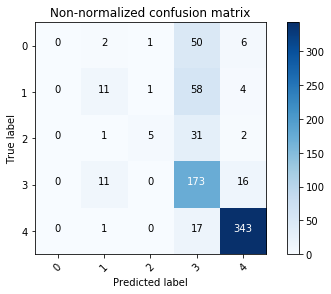

In [206]:
cm_ = confusion_matrix(y_test.argmax(axis = 1), cnn.predict(X_test).argmax(axis=1))
classes_ = ['0','1','2','3','4']
plot_confusion_matrix(cm_, classes = classes_, normalize=False,
                      title='Non-normalized confusion matrix')

In [3]:
for i in [59,74,39,200,361]:
    print(i/733)

0.08049113233287858
0.1009549795361528
0.05320600272851296
0.2728512960436562
0.4924965893587995


For the labels in the confusion matrix above, the digits correspond to the classes like: (label, actual class)

(0, three)
(1, two)
(2, four)
(3, one)
(4, zero)

zero  0.4929000546149645
one   0.272801747678864
two   0.1010376843255052
three 0.08055707263790278
four  0.052703440742763515

In [2]:
sorted(['zero','one','two','three','four'])

['four', 'one', 'three', 'two', 'zero']

In [226]:
sum(pd.DataFrame(y_train)[0])

189.0

In [269]:
#saving the model and its weights
model_json = cnn.to_json()
with open("basic_cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("basic_cnn_weights.h5")
print("Saved model")

Saved model


## Transfer Learning

### VGG16

In [253]:
images.shape

(3662, 224, 224, 3)

In [254]:
labels.shape

(3662, 5)

In [255]:
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123, stratify = labels)

In [256]:
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123, stratify = y_model)

In [257]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [258]:
model = Sequential()

In [259]:
model.add(base_model)
# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(5, activation='softmax')) #final layer with softmax activation

In [260]:
model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [261]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights = True)

In [262]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [263]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 vgg16
1 global_average_pooling2d_2
2 dense_7
3 dropout_4
4 dense_8
5 dropout_5
6 dense_9
7 dense_10


In [247]:
# # freeze first 16 layers
# for layer in model.layers[:16]:
#     layer.trainable=False
# for layer in model.layers[16:]:
#     layers.trainable = True

In [264]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 vgg16 True
1 global_average_pooling2d_2 True
2 dense_7 True
3 dropout_4 True
4 dense_8 True
5 dropout_5 True
6 dense_9 True
7 dense_10 True


In [265]:
# model.compile(loss='categorical_crossentropy',
#               optimizer="sgd",
#               metrics=['acc'])

In [266]:
model_hist = model.fit(X_train,
                    y_train,
                    epochs=25,
                    batch_size=50,
                    validation_data=(X_val, y_val),
                  callbacks=[early_stopping])

Train on 2343 samples, validate on 586 samples
Epoch 1/25
2343/2343 [==============================] - 2149s 917ms/step - loss: 1.4986 - acc: 0.4170 - val_loss: 1.3667 - val_acc: 0.4932
Epoch 2/25
2343/2343 [==============================] - 2152s 918ms/step - loss: 1.5040 - acc: 0.4434 - val_loss: 1.3940 - val_acc: 0.4932
Epoch 3/25
2343/2343 [==============================] - 2153s 919ms/step - loss: 1.4895 - acc: 0.4682 - val_loss: 1.4881 - val_acc: 0.4932
Epoch 4/25
2343/2343 [==============================] - 2156s 920ms/step - loss: 1.4286 - acc: 0.4930 - val_loss: 1.3742 - val_acc: 0.4932
Epoch 5/25
2343/2343 [==============================] - 2155s 920ms/step - loss: 1.3474 - acc: 0.4930 - val_loss: 1.3220 - val_acc: 0.4932
Epoch 6/25
2343/2343 [==============================] - 2155s 920ms/step - loss: 1.3142 - acc: 0.4930 - val_loss: 1.3029 - val_acc: 0.4932
Epoch 7/25
 100/2343 [>.............................] - ETA: 31:50 - loss: 1.3239 - acc: 0.5000

KeyboardInterrupt: 